# Embedded pairs for optimal SSPERK$(n^2,3)$ methods

## Embedded pair obtained by optimization (10)
<br>
The embedded pair is 

$$b^T=\left[\frac{1}{n^2},\ldots,\frac{1}{n^2}\right]\in\mathbb{R}^{n^2}.$$

We compare our embedded methods and the original method based on the stability radius values.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from nodepy import rk
import numpy as np
import math

SSPRK43

 0   |
 1/2 | 1/2
 1   | 1/2  1/2
 1/2 | 1/6  1/6  1/6
_____|____________________
     | 1/6  1/6  1/6  1/2
[0.25 0.25 0.25 0.25]


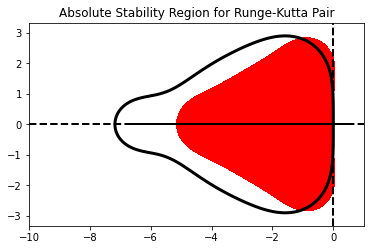

In [5]:
## SSPERK(n^2,3) methods
n = 2
rk3 = rk.SSPRK3(n**2)
print(rk3)

# Embedded pair 
b_our = 1./n**2 * np.ones(n**2)
print(b_our)
rk_b_our_pair = rk.ExplicitRungeKuttaPair(rk3.A,rk3.b,b_our)

# Stability region and save to a file
fig1=rk_b_our_pair.plot_stability_region(N=1000);
#fig1.axes[0].set_title('Absolute stability region ')
#fig1.axes[0].set_title('')
#plt.savefig('SSPERK363.eps', format='eps', dpi=10000)


In [6]:
## Real stability interval, Imaginary stability interval, Circle contractivity radius
print('SSPERK(n^2,3) stability radius values')
print(rk3.__num__().real_stability_interval())
print(rk3.__num__().imaginary_stability_interval())
print(rk3.__num__().circle_contractivity_radius())
print(rk3.__num__().absolute_monotonicity_radius())
print('\n')

print('Our stability radius values')
print(rk_b_our_pair.embedded_method.__num__().real_stability_interval(mode='float'))
print(rk_b_our_pair.embedded_method.__num__().imaginary_stability_interval(mode='float'))
print(rk_b_our_pair.embedded_method.__num__().circle_contractivity_radius())
print(rk_b_our_pair.embedded_method.__num__().absolute_monotonicity_radius())

SSPERK(n^2,3) stability radius values
5.149486147774052
2.1561796401676547
2.0000000000000573
1.9999999999527063


Our stability radius values
7.174802103936393
0
2.000000000000113
1.9999999999527063


We compare our embedded method and the original method based on the error metric values.

In [7]:
## The common metric values for the original method and the embedded methods 
print('SSPERK(n^2,3) error metrics')
rk3 = rk.SSPRK3(n**2)
original=rk3.error_metrics()
print([float(original[i]) for i in range(len(original))])
print('\n')

print('Our error metrics')
b1 = 1./n**2 * np.ones(n**2)
rk3.b=b_our
embedded=rk3.error_metrics()
print([float(embedded[i]) for i in range(len(embedded))])

SSPERK(n^2,3) error metrics
main method has order 3
[0.03608439182435161, 0.020833333333333332, 0.030230276193998495, 0.022916666666666665, 1.0]


Our error metrics
main method has order 2
[0.04658474953124561, 0.04166666666666666, 0.04540519732854868, 0.03125, 1.0]


##  Comparison of our and the literature embedded methods for $n^2=4$ 
<br>
The embedded pair obtained by optmization (11) is

$$ w^T=\left[0.138870252716866,\ 0.722259494566267,\ 0.138870252716866, 0\right].$$

SSPRK43

 0   |
 1/2 | 1/2
 1   | 1/2  1/2
 1/2 | 1/6  1/6  1/6
_____|____________________
     | 1/6  1/6  1/6  1/2


Text(0.5, 1.0, 'Absolute stability region - literature pair')

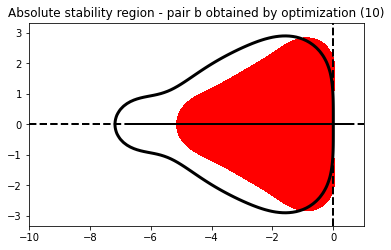

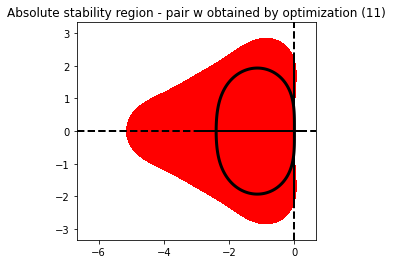

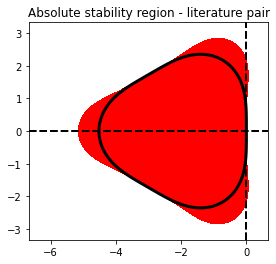

In [17]:
## SSPERK(4,3) method
rk3 = rk.SSPRK3(4)
print(rk3)

## Our pair - obtained by optimization (10)
b_our = 1./4 * np.ones(4)
#print(b_our)
rk_b_our_pair = rk.ExplicitRungeKuttaPair(rk3.A,rk3.b,b_our)
# Stability region and save to a file
fig1=rk_b_our_pair.plot_stability_region(N=100);
fig1.axes[0].set_title('Absolute stability region - pair b obtained by optimization (10)')
#fig1.axes[0].set_title('')
#plt.savefig('SSPERK43.eps', format='eps', dpi=10000)

## Our pair - obtained by optimization (11)
w = np.array([0.138870252716866, 0.722259494566267, 0.138870252716866, 0])
#print(w)
rk_w_pair = rk.ExplicitRungeKuttaPair(rk3.A,rk3.b,w)
# Stability region and save to a file
fig1w=rk_w_pair.plot_stability_region(N=100);
fig1w.axes[0].set_title('Absolute stability region - pair w obtained by optimization (11)')
#fig1w.axes[0].set_title('')
#plt.savefig('SSPERK43w.eps', format='eps', dpi=10000)

## The literature one pair
b_literature = 1./3 * np.ones(4);
b_literature[3]=0.;
#print(b_literature)
rk_b_literature_pair = rk.ExplicitRungeKuttaPair(rk3.A,rk3.b,b_literature)
fig2=rk_b_literature_pair.plot_stability_region(N=100);
fig2.axes[0].set_title('Absolute stability region - literature pair')
#fig2.axes[0].set_title('')
#plt.savefig('SSPERK43b.eps', format='eps', dpi=10000)


In [18]:
## Real stability interval, Imaginary stability interval, Circle contractivity radius
print('The SSPERK(4,3) method - stability radius values')
print(rk3.__num__().real_stability_interval())
print(rk3.__num__().imaginary_stability_interval())
print(rk3.__num__().circle_contractivity_radius())
print(rk3.__num__().absolute_monotonicity_radius())

print('\n')
print('Our stability radius values - pair b')
print(rk_b_our_pair.embedded_method.__num__().real_stability_interval())
print(rk_b_our_pair.embedded_method.__num__().imaginary_stability_interval())
print(rk_b_our_pair.embedded_method.__num__().circle_contractivity_radius())
print(rk_b_our_pair.embedded_method.__num__().absolute_monotonicity_radius())

print('\n')
print('Our stability radius values - pair w')
print(rk_w_pair.embedded_method.__num__().real_stability_interval())
print(rk_w_pair.embedded_method.__num__().imaginary_stability_interval())
print(rk_w_pair.embedded_method.__num__().circle_contractivity_radius())
print(rk_w_pair.embedded_method.__num__().absolute_monotonicity_radius())

print('\n')
print('Literature stability radius values')
print(rk_b_literature_pair.embedded_method.__num__().real_stability_interval())
print(rk_b_literature_pair.embedded_method.__num__().imaginary_stability_interval())
print(rk_b_literature_pair.embedded_method.__num__().circle_contractivity_radius())
print(rk_b_literature_pair.embedded_method.__num__().absolute_monotonicity_radius())

The SSPERK(4,3) method - stability radius values
5.149486147774052
2.1561796401676547
2.0000000000000573
1.9999999999527063


Our stability radius values - pair b
7.174802103936393
0
2.000000000000113
1.9999999999527063


Our stability radius values - pair w
2.3999194978127436
7.013478568802042e-08
0.7282126045619619
0.3313851389066258


Literature stability radius values
4.519842099789738
0
2.000000000000113
1.9999999999527063


In [19]:
rk3 = rk.SSPRK3(4)
original=rk3.error_metrics()
print('SSPERK(4,3) error metric values')
print([float(original[i]) for i in range(len(original))])
print('\n')

b_our = 1./4 * np.ones(4)
rk3.b=b_our
embedded=rk3.error_metrics()
print('Our error metric values - pair b')
print([float(embedded[i]) for i in range(len(embedded))])
print('\n')

w = np.array([0.138870252716866, 0.722259494566267, 0.138870252716866, 0])
rk3.b=w
embedded=rk3.error_metrics()
print('Our error metric values - pair w')
print([float(embedded[i]) for i in range(len(embedded))])
print('\n')

rk3.b=b_literature
embedded=rk3.error_metrics()
print('Literature error metric values')
print([float(embedded[i]) for i in range(len(embedded))])

main method has order 3
SSPERK(4,3) error metric values
[0.03608439182435161, 0.020833333333333332, 0.030230276193998495, 0.022916666666666665, 1.0]


main method has order 2
Our error metric values - pair b
[0.04658474953124561, 0.04166666666666666, 0.04540519732854868, 0.03125, 1.0]


main method has order 2
Our error metric values - pair w
[0.1321319641510756, 0.13194910348745015, 0.10482014304834764, 0.09028243682078349, 1.0]


main method has order 2
Literature error metric values
[0.09316949906249122, 0.08333333333333333, 0.06588078458684124, 0.04166666666666667, 1.0]


#  The embedded pair for SSPERK$(3,3)$ obtained by optimization (11)
<br>

The embedded pair is

$$ w^T=\left[0.291485418878409,\ 0.291485418878409,\ 0.417029162243181\right].$$

SSPRK 33
The optimal 3-stage, 3rd order SSP Runge-Kutta method
 0   |
 1   | 1
 1/2 | 1/4  1/4
_____|_______________
     | 1/6  1/6  2/3
     | 0.291 0.291 0.417
<module 'nodepy.runge_kutta_method' from 'C:\\Users\\imrefekete\\Anaconda3\\envs\\Andris\\lib\\site-packages\\nodepy\\runge_kutta_method.py'>


Text(0.5, 1.0, 'Absolute stability region')

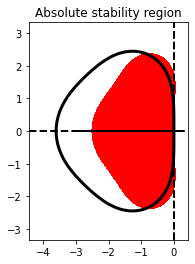

In [34]:
## SSPERK(3,3) method
SSP33 = rk.loadRKM('SSP33')
print(SSP33)

rk.A = np.array([[0, 0, 0],
       [1, 0, 0],
       [1/4, 1/4, 0]])
rk.b = np.array([1/6, 1/6, 2/3])

print(rk)

## Our pair 
w = np.array([0.291485418878409,
   0.291485418878409,
   0.417029162243181])
#print(b_our)
rk_w_pair = rk.ExplicitRungeKuttaPair(rk.A,rk.b,w)
# Stability region and save to a file
fig1=rk_w_pair.plot_stability_region(N=100);
fig1.axes[0].set_title('Absolute stability region')
#fig1.axes[0].set_title('')
#plt.savefig('SSPERK33w.eps', format='eps', dpi=10000)

In [22]:
## Real stability interval, Imaginary stability interval, Circle contractivity radius
print('The SSPERK(3,3) method - stability radius values')
print(SSP33.__num__().real_stability_interval())
print(SSP33.__num__().imaginary_stability_interval())
print(SSP33.__num__().circle_contractivity_radius())
print(SSP33.__num__().absolute_monotonicity_radius())

print('\n')
print('Our stability radius values')
print(rk_w_pair.embedded_method.__num__().real_stability_interval())
print(rk_w_pair.embedded_method.__num__().imaginary_stability_interval())
print(rk_w_pair.embedded_method.__num__().circle_contractivity_radius())
print(rk_w_pair.embedded_method.__num__().absolute_monotonicity_radius())

The SSPERK(3,3) method - stability radius values
2.5127453266183255
1.7320508075688772
1.0000000000000564
0.9999999999308784


Our stability radius values
3.610800444941736
1.3686940999825343e-07
1.0000000000000009
0.9999999999308784


In [35]:
rk.A = np.array([[0, 0, 0],
       [1, 0, 0],
       [1/4, 1/4, 0]])
rk.b = np.array([1/6, 1/6, 2/3])

print(rk)
rk_pair_original = rk.ExplicitRungeKuttaPair(rk.A,rk.b,rk.b)
original=rk_pair_original.error_metrics()
print('SSPERK(3,3) error metric values')
print(original)

print('\n')
embedded=rk_w_pair.error_metrics()
print('w error metric values')
print([float(embedded[i]) for i in range(len(embedded))])
print('\n')



<module 'nodepy.runge_kutta_method' from 'C:\\Users\\imrefekete\\Anaconda3\\envs\\Andris\\lib\\site-packages\\nodepy\\runge_kutta_method.py'>
main method has order 3
embedded method has order 3
SSPERK(3,3) error metric values
(0.0721687836487032, 0.0416666666666667, 0.0564863433320364, 1/30, 0.0721687836487032, 0.0416666666666667, 0.782697732678932, 0.800000000000000, 0, 0, 1.0, 0.782697732678932, 0.800000000000000)


main method has order 3
embedded method has order 2
w error metric values
[0.07216878364870323, 0.04166666666666667, 0.056486343332036386, 0.03333333333333333, 0.0697758037030397, 0.06240937610587141, 1.2327881825842322, 1.1676347252051236, 0.6708203932499375, 0.5, 1.0, 1.0342952688276852, 0.6676347252051237]


